<a href="https://colab.research.google.com/github/slrodr/AER850-Project3/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

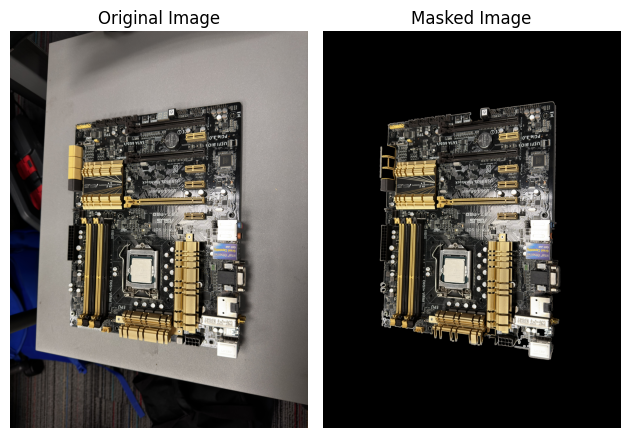

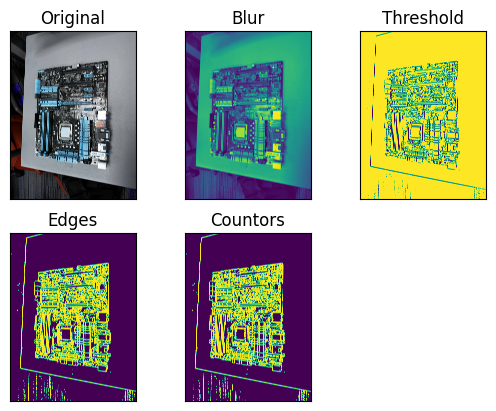

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

motherboard = cv2.imread("/content/drive/MyDrive/AER850 Project 3/motherboard_image.JPEG")
''' Step 1: Object Masking '''
# Convert to grayscale
gray_mb = cv2.cvtColor(motherboard, cv2.COLOR_BGR2GRAY)

#Apply blur
blur_mb = cv2.GaussianBlur(gray_mb, (45, 45), 0)

#Thresholding
thresholded_mb= cv2.adaptiveThreshold(blur_mb, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 5)
#thresholded_mb2= cv2.adaptiveThreshold(blur_mb, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 5)

#Edge Detection
edges = cv2.Canny(thresholded_mb, 1, 1)
edges = cv2.dilate(edges,None, iterations = 8)

#Contour Detection
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_image = edges.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

#Filter countours
min_area = 10
max_area = 2000
filtered_contours = [cnt for cnt in contours if min_area < cv2.contourArea(cnt) < max_area]

#Create a mask
mask = np.zeros_like(blur_mb)

#Draw contours on mask
cv2.drawContours(mask, [max(contours, key=cv2.contourArea)], -1, (255, 255, 255), thickness=cv2.FILLED)

#Apply mask to original image
masked_mb = cv2.bitwise_and(motherboard, motherboard, mask=mask)

#Plot original and masked images
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(motherboard, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Masked Image')
plt.imshow(cv2.cvtColor(masked_mb, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()
#For visualization while working
plt.subplot(231),plt.imshow(motherboard),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(blur_mb),plt.title('Blur')
plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(thresholded_mb),plt.title('Threshold')
plt.xticks([]), plt.yticks([])
#plt.subplot(224),plt.imshow(thresholded_mb2),plt.title('Threshold2')
#plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(edges),plt.title('Edges')
plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(edges),plt.title('Countors')
plt.xticks([]), plt.yticks([])
plt.show()



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
'''Step 2: Training model'''
model = YOLO('yolov8n.pt')
results = model.train(
    data='/content/drive/MyDrive/AER850 Project 3/Data/data.yaml',  # Path to the dataset YAML file
    epochs=50,                  # Number of training epochs (stay below 200)
    batch=8,                    # Number of images per batch
    imgsz=928,                   # Image size for training (min 900 for small components)
    name='pcb_component_detector'  # Name of the trained model
)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/AER850 Project 3/Data/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=928, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=pcb_component_detector2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

train: Scanning /content/drive/MyDrive/AER850 Project 3/Data/train/labels.cache... 544 images, 0 backgrounds, 0 corrupt: 100%|██████████| 544/544 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 108783. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/AER850 Project 3/Data/valid/labels.cache... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 19108. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/pcb_component_detector2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 928 train, 928 val
Using 0 dataloader workers
Logging results to runs/detect/pcb_component_detector2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G       2.85      4.834      1.544       2987        928:   1%|▏         | 1/68 [01:24<1:34:54, 85.00s/it]


KeyboardInterrupt: 

In [ ]:
metrics = model.eval()
evaluation_images = [
    "/content/drive/MyDrive/AER850 Project 3/Data/evaluation/ardmega.jpg",
    '/content/drive/MyDrive/AER850 Project 3/Data/evaluation/arduno.jpg',
    '/content/drive/MyDrive/AER850 Project 3/Data/evaluation/rasppi.jpg'
]

# Loop through each image and make predictions
for img_path in evaluation_images:
    results = model.predict(source=img_path, conf=0.5, save=True)
    print(f"Results for {img_path}:")
    for result in results:
        result.plot(font_size=10)


image 1/1 /content/drive/MyDrive/AER850 Project 3/Data/evaluation/ardmega.jpg: 832x928 4 Capacitors, 4 Connectors, 6 ICs, 15 Resistors, 12.5ms
Speed: 6.3ms preprocess, 12.5ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 928)
Results saved to runs/detect/pcb_component_detector6
Results for /content/drive/MyDrive/AER850 Project 3/Data/evaluation/ardmega.jpg:

image 1/1 /content/drive/MyDrive/AER850 Project 3/Data/evaluation/arduno.jpg: 640x928 9 Capacitors, 3 Connectors, 5 ICs, 12.9ms
Speed: 5.8ms preprocess, 12.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 928)
Results saved to runs/detect/pcb_component_detector7
Results for /content/drive/MyDrive/AER850 Project 3/Data/evaluation/arduno.jpg:

image 1/1 /content/drive/MyDrive/AER850 Project 3/Data/evaluation/rasppi.jpg: 640x928 5 Capacitors, 6 Connectors, 4 ICs, 1 Resistor, 15.1ms
Speed: 7.6ms preprocess, 15.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 928)
Results saved to runs/detect